# car price prediction

In [22]:
#importing all the required packages
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


**data collection and processing**

In [23]:
#loading the dataset
data=pd.read_csv('/content/car data.csv')



In [24]:
#printing the first five rows of the datset
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
data.shape
#gives the no of rows and columns

(301, 9)

In [26]:
#getting basic info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
#handling the missing data
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [28]:
#checking the distribution for the categerial data
print(data.Fuel_Type.value_counts())
print(data.Selling_type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**encoding the categorial data**

In [29]:
#encoding all 3 columns which are in string formats
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [30]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
#splitting

**spliting tarining and testing data**

In [31]:
X=data.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y=data['Selling_Price']

In [32]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [33]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

# Model training

**Linear regression**

In [41]:
lin_reg_model=LinearRegression()

In [42]:
lin_reg_model.fit(X_train,Y_train)  #this function used to train the model

LinearRegression()

**model evaluation**

In [43]:
#prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [44]:
#r zquare metric error
error_score=metrics.r2_score(Y_train,training_data_prediction)   #y train has the origibal values,and this tarinig_data_prediction have the values which is predicted by the model
print("R squared error:",error_score*100)

R squared error: 87.96483009370215


**visualize the actual prices and predicted prices**

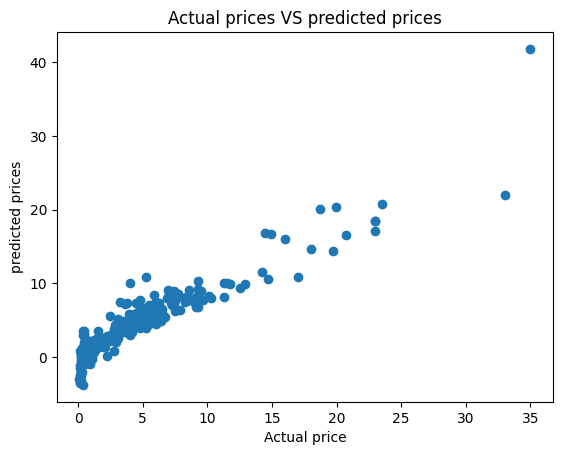

In [45]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted prices")
plt.title("Actual prices VS predicted prices")
plt.show()

In [47]:
#prediction on training data
test_data_prediction=lin_reg_model.predict(X_test)



In [50]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.8365861023210703


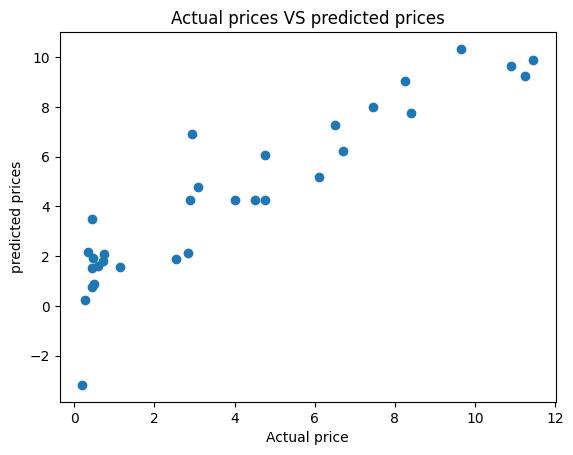

In [51]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted prices")
plt.title("Actual prices VS predicted prices")
plt.show()

**Lasso regression**

In [53]:
lass_reg_model=Lasso()

In [54]:
lass_reg_model.fit(X_train,Y_train)  #this function used to train the model

Lasso()

In [57]:
#prediction on training data
training_data_prediction=lass_reg_model.predict(X_train)

In [58]:
#r zquare metric error
error_score=metrics.r2_score(Y_train,training_data_prediction)   #y train has the origibal values,and this tarinig_data_prediction have the values which is predicted by the model
print("R squared error:",error_score*100)

R squared error: 84.24480718240743


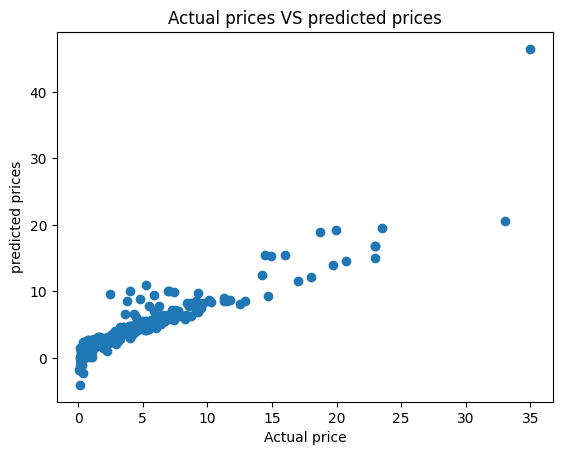

In [59]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted prices")
plt.title("Actual prices VS predicted prices")
plt.show()

In [60]:
#prediction on training data
test_data_prediction=lass_reg_model.predict(X_test)

In [61]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.8709763132343395


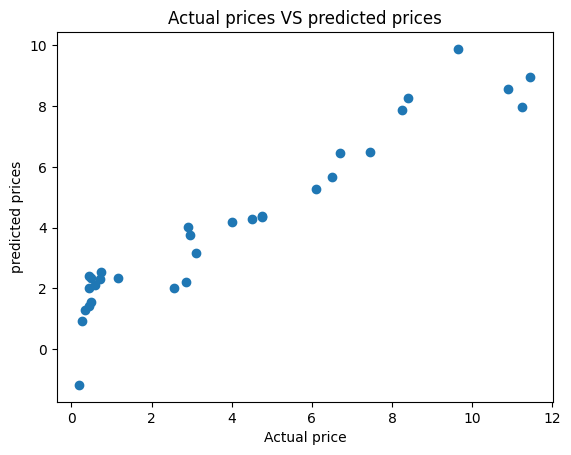

In [62]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted prices")
plt.title("Actual prices VS predicted prices")
plt.show()